# Combatting Global Terrorist Networks and Hostile Areas of Concern
## Using Predictive Analysis and Agent-based Modeling to Determine Areas of Possible Hostile Threat and Direct Military Deployment

### Introduction and Explaination of project
Since the terrorist attack on the United States of America on September 11, 2001, the number of global attacks conducted by a terrorist group or network has risen from under 2000 incidents per year to roughly 14,000 incidents in the year 2016 alone.[$^1$](https://ourworldindata.org/terrorism) As a result, global militaries have increased planning, budgeting, intelligence gathering, and troop deployments to combat the ever growing threat. However, with humans being prone to error or a narrowed focus on a specific objective, larger trends and responses to specific strategies are left unknown or neglected in order to accomplish the set task.

It costs \$2,100,000 each year to deploy 1 US soldier to Afghanistan.[$^2$](https://www.yahoo.com/news/it-costs--2-1-million-per-year-for-each-soldier-deployed-in-afghanistan--report-133150602.html) If the soldier must constantly be redeployed to a new base within the country, the amount rises even further. What if there was a way to accurately predict which region of a given country or area was most prone to carry out hostile actions that would require a military presence? The soldier could then be more effectively placed to either respond to such aggresion, or possibly defuse the event entirely. With the correct
data and the right model, we can even take this question a step further. What if the deployed soldier's presence, while able to defuse a hostile intent in the specific region, in fact caused a larger hostile response from the terrorist network? For example, while the minor riot in a small village (20-30 members) may have been quelled, the terror network responds with a suicide bombing upon a military base. Or the reverse, if the soldier is deployed in the neighboring region instead, would the effect of the military presence radiate to the area of concern, quelling the possible hostile action without the aggressive response?

For my capstone project at Thinkful, I intend to use machine learning and agent-based modeling to accurately predict an area of concern in a given region, the likelyhood of a hostile action being taken, and the most effective deployment of US troops. In order to accompish this, though, I must first be able to structure a virtual terrorist network with accurate characteristics, including the range of hostility toward US troops, religious background and adherence, ranking structure within the network, average number of members of the network within a given population size, response to proximity of US troops, and others. While some of this data may not be possible to obtain, much of this data can be obtained through declassfied military and government documents or third-party watchgroups and organizations.

In this report, I will begin to explore the characteristics of a terrorist network, which we will use when constructing the agent-based model. The John Jay \& ARTIS Transnational Terrorism Database (Individual Attributes)[$^3$](http://doitapps.jjay.cuny.edu/jjatt/attributes.php) provides some key data that I will incorporate into the model later.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
df = pd.read_csv('C://duh/Thinkful/attributes.csv')

### Average Age of Joining a Terrorist Network
In this database, we find that out of 2157 individual recorded, only 379 of them did the report have a known age of the individual when they joined their respective terrorist group. On average, the 50\% joined between the ages of 21 to 30, 25\% between the ages of 14 to 20, and 25\% from 30 to 44, with the mean age of joining being just after turning 26. This infers that most individuals become radicalized and incorporated with a terrorist group in their adolesence. Noteably, there are some extreme cases of adults joining far later in life, with the max known age of 61 years old. 

We can use this information when creating a realistic agent-based model by understanding how long a given agent may be able to respond and act before a 'natural' death occurs. When the model is generated, it will need to create agents with the characteristic of "age" that will be incremented after a given number of iterations of the model. This is useful when determining the hostility level of a given region and the necessity of responce from the military. For example, if a small village has a high propability of conducting a hostile action within the next 5 years, but 80\% of those with hostile intent are forecasted to pass away within the next 2 years, part of the military response could incorporate waiting until such natural deaths occur. This could save the military from unnecessary deployment (saving the cost of deployment) and may in turn reduce the likelihood of a hostile action or retaliation from occuring.

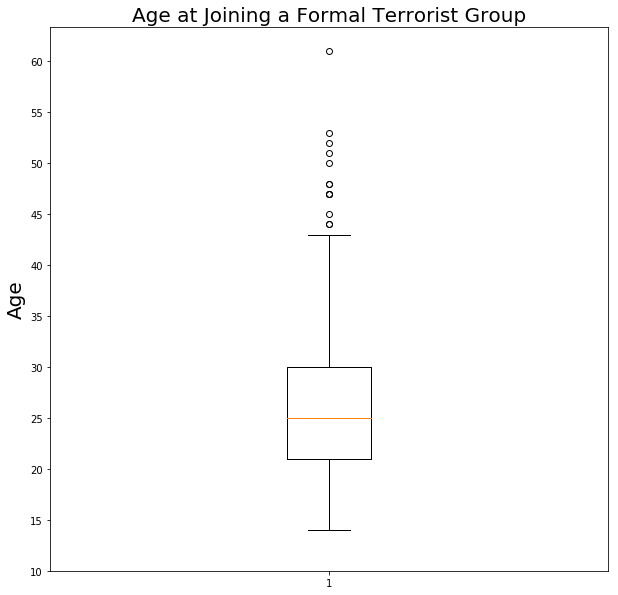

In [2]:
plt.figure(figsize=(10,10))
plt.boxplot(df['AgeJoin'].dropna())
plt.title("Age at Joining a Formal Terrorist Group", size=20)
plt.ylabel("Age", size=20)
plt.yticks([10,15,20,25,30,35,40,45,50,55,60])
plt.show()

In [3]:
print("Total count of terrorist in database: " + str(df['ID'].count()))
print("Desciption of 'Age Joined': ")
df['AgeJoin'].dropna().describe()

Total count of terrorist in database: 2157
Desciption of 'Age Joined': 


count    379.000000
mean      26.248021
std        7.050965
min       14.000000
25%       21.000000
50%       25.000000
75%       30.000000
max       61.000000
Name: AgeJoin, dtype: float64

### Position Held in Organization
Text here

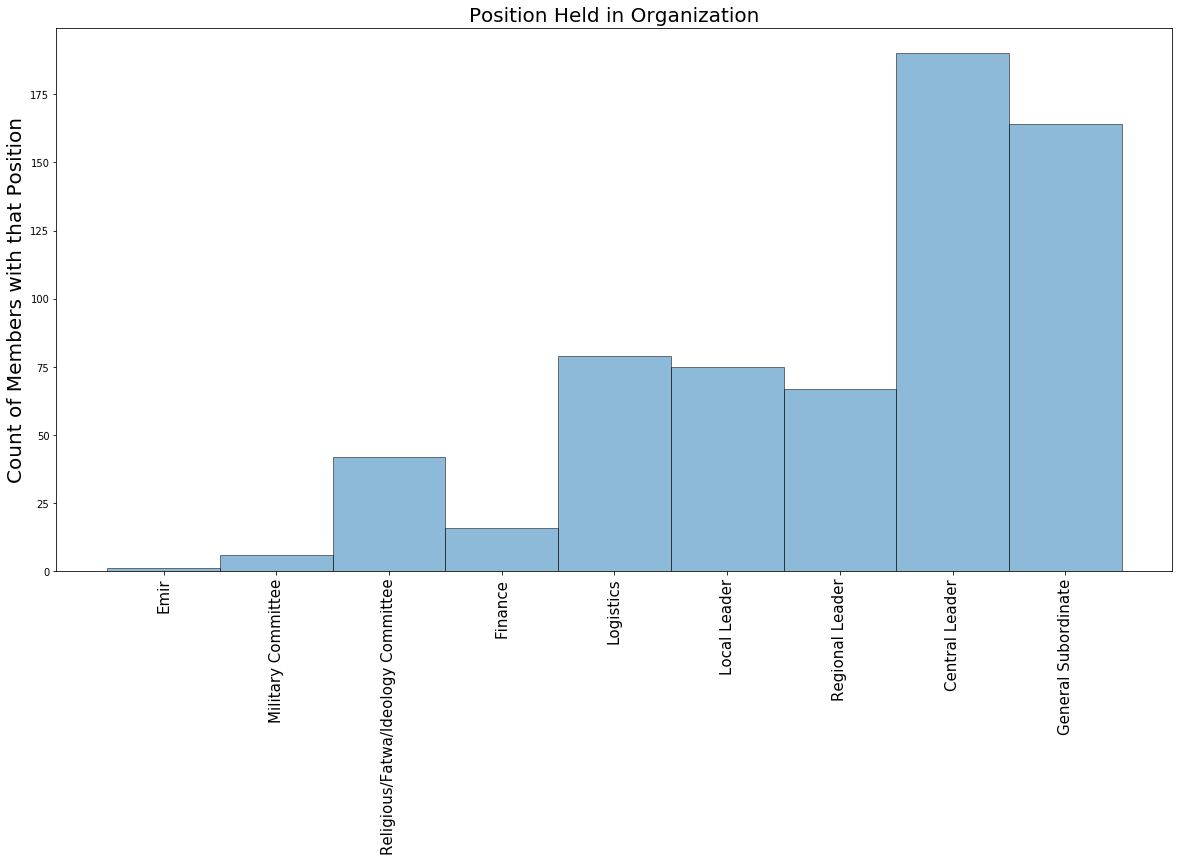

In [4]:
pos_labels = ['Emir', 'Military Committee', 'Religious/Fatwa/Ideology Committee', 'Finance', 'Logistics', 'Local Leader', 'Regional Leader', 'Central Leader', 'General Subordinate']
plt.figure(figsize=(20,10))
plt.hist(df['Pos'].dropna(), bins=9, alpha=.5, edgecolor='black', align='right')
plt.title('Position Held in Organization', size=20)
plt.ylabel('Count of Members with that Position', size=20)
plt.tick_params(labelrotation=.55)
plt.xticks([1,2,3,4,5,6,7,8,9], pos_labels, rotation=90, size=15)
plt.show()

In [5]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0
count10 = 0
count11 = 0
count12 = 0
count13 = 0
for item in df['Op1Role1'].dropna():
    if item == 1:
        count1 += 1
    elif item == 2:
        count2 += 1
    elif item == 3:
        count3 += 1
    elif item == 4:
        count4 += 1
    elif item == 5:
        count5 += 1
    elif item == 6:
        count6 += 1
    elif item == 7:
        count7 += 1
    elif item == 8:
        count8 += 1
    elif item == 9:
        count9 += 1
    elif item == 10:
        count10 += 1
    elif item == 11:
        count11 += 1
    elif item == 12:
        count12 += 1
    elif item == 13:
        count13 += 1
plt_roles = [count1, count2, count3, count4, count5, count6, count7, count8, count9, count10, count11, count12, count13]

In [6]:
plt_labels = ['Sympathizer', 'Foot Soldier', 'Recruiter', 'Financer', 'Logistician', 'Emir', 'Ideologue', 'Bomber',
              'Bomb Fabrication', 'Weapons Purveyor', 'Weapons Acquisition', 'Trainer', 'Unknown']

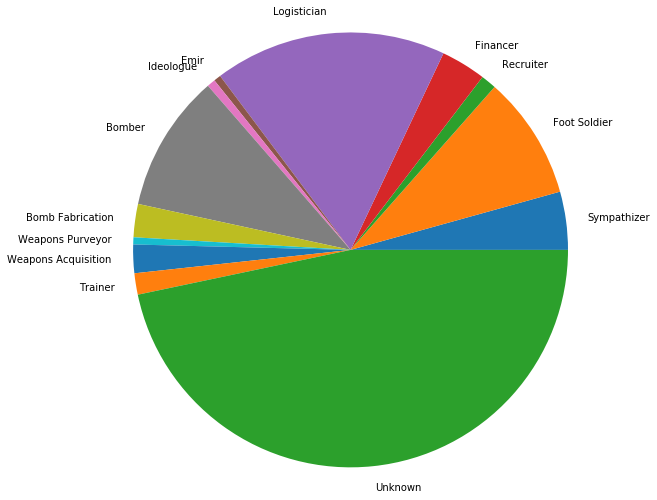

In [7]:
plt.pie(plt_roles, labels=plt_labels, radius=2.5)
plt.show()

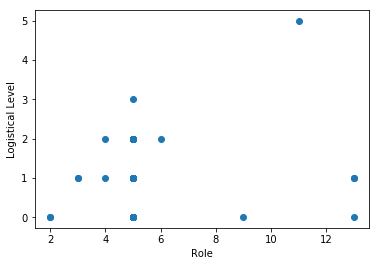

In [8]:
plt.scatter(df['Op1Role1'], df['LogLev1'])
plt.xlabel('Role')
plt.ylabel('Logistical Level')
plt.show()

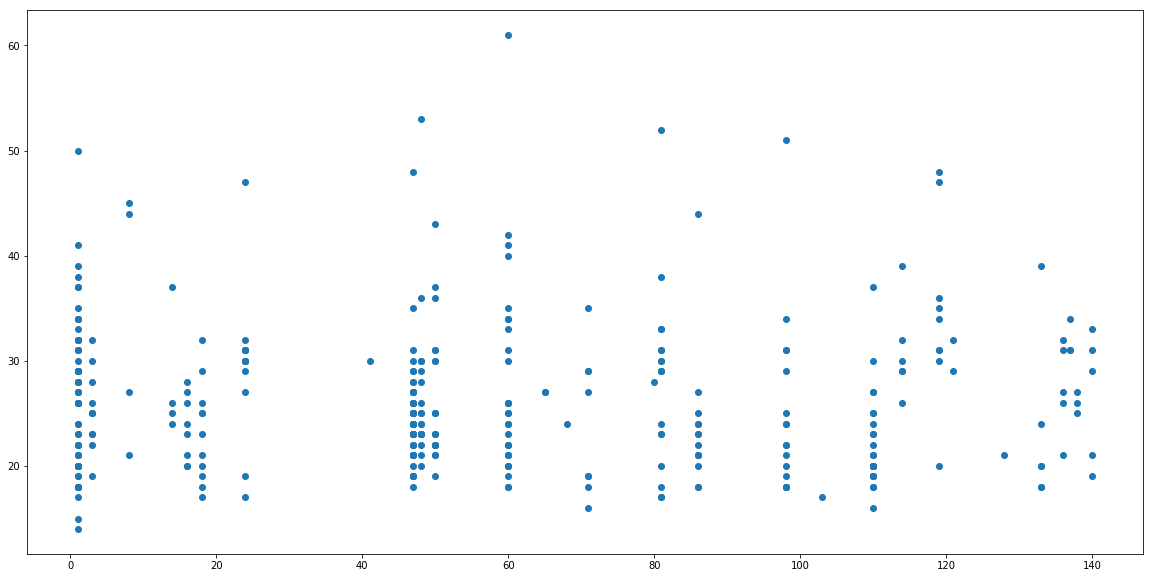

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(df['Cjoin'], df['AgeJoin'])
plt.show()

In [10]:
df['Cjoin'].value_counts()

60.0     82
1.0      69
47.0     53
114.0    37
110.0    31
86.0     22
50.0     22
48.0     21
81.0     21
98.0     17
24.0     14
119.0    14
18.0     12
3.0      11
133.0     9
136.0     9
16.0      8
71.0      8
8.0       5
140.0     5
137.0     4
14.0      4
138.0     3
103.0     2
65.0      2
121.0     2
80.0      1
128.0     1
41.0      1
68.0      1
62.0      1
Name: Cjoin, dtype: int64